# Programación para *Data Science*

Unidad 8: Visualización de datos en Python
------------------------------------------------------

## Instrucciones de uso

A continuación se presentarán explicaciones y ejemplos de generación de visualizaciones de datos en Python. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

## Introducción

En módulos anteriores ya hemos visto cómo generar algunas visualizaciones básicas de datos con la librería [Matplotlib](https://matplotlib.org/). En este módulo nos centraremos en la generación de visualizaciones de datos más avanzadas. En primer lugar, veremos algunas funcionalidades de la librería [seaborn](https://seaborn.pydata.org/), que proporciona una interfaz de alto nivel a matplotlib con la que generar gráficas atractivas con pocas líneas de código. En segundo lugar, veremos cómo representar datos de redes en forma de grafos con la librería [Networkx](https://networkx.github.io/). Finalmente, veremos cómo podemos representar datos espaciales sobre mapas con la librería [geoplotlib](https://github.com/andrea-cuttone/geoplotlib). 

Además de las librerías que acabamos de mencionar, durante este módulo utilizaremos también las librerías que ya hemos ido presentando en los módulos anteriores: [NumPy](http://www.numpy.org/), [pandas](http://pandas.pydata.org/) y [scikit-learn](http://scikit-learn.org).

## Primeros pasos

Para empezar, importamos las librerías que usaremos en este Notebook y que ya hemos presentado anteriormente.

In [2]:
# Importamos numpy, pandas, Matplotlib y los datasets de sklearn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Mostramos las gráficas en el notebook.
%matplotlib inline

## Gráficas con seaborn

En primer lugar, veremos algunos ejemplos de generación de gráficas con la librería [seaborn](https://seaborn.pydata.org/). Para ello, usaremos el conjunto de datos de flores Iris que ya hemos visto en módulos anteriores.

In [4]:
# Cargamos el dataset de Iris:
iris = datasets.load_iris()

# Guardamos los datos en la variable data.
data = iris.data

# Creamos un dataframe de pandas con los datos.
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])

# Mostramos las primeras 5 filas del dataframe.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


La función [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) permite crear una gráfica de dos variables, ofreciendo tanto información conjunta sobre las variables como marginal. La misma función puede ser utilizada para crear diferentes tipos de gráficas. Veamos algunos ejemplos.

Para empezar, crearemos una gráfica de dispersión (en inglés, _scatter plot_) representando las muestras según las características del sépalo. Además, mostraremos histogramas marginales (que representarán la distribución de ambas características de manera individual). 

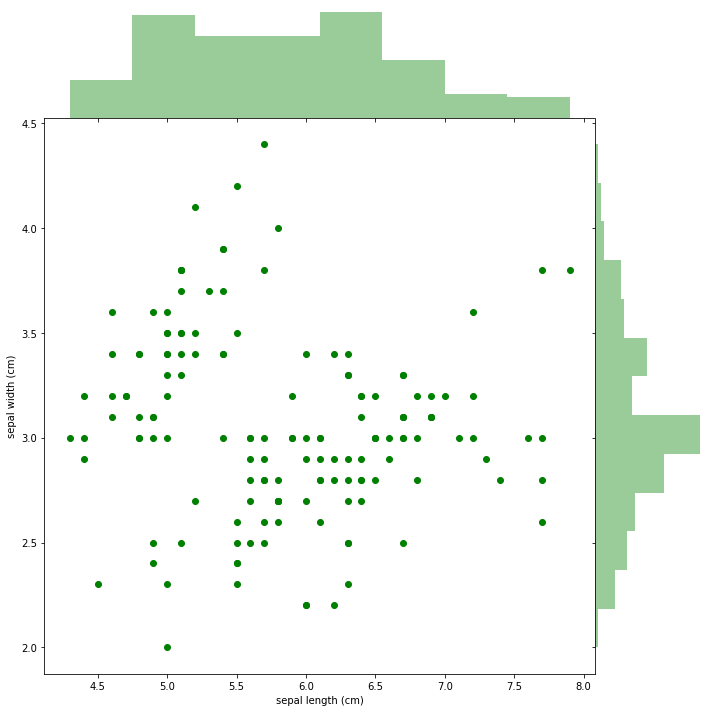

In [3]:
# Importamos la librería seaborn.
import seaborn as sns

# Creamos un jointplot de tipo "scatter", indicando los nombres de las dos columnas
# que queremos utilizar como variables, el color y el tamaño de la figura.
g = sns.jointplot("sepal length (cm)", "sepal width (cm)", 
                  data=df, 
                  kind="scatter", 
                  space=0, color="g", height=10)

La gráfica de dispersión nos ofrece una primera aproximación a los datos: podemos ver cómo están distribuídas las muestras según la longitud y el ancho del sépalo.

La función jointplot es muy versátil. Utilizando la misma función pero cambiando el tipo de gráfico a `hex`, podemos sustituir el diagrama de dispersión por un histograma conjunto usando intervalos (_bins_) hexagonales.

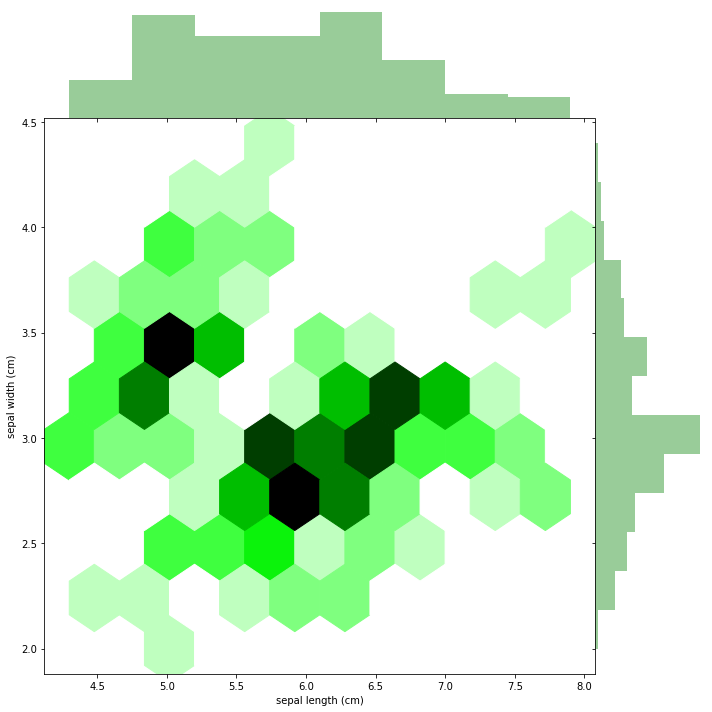

In [4]:
# Importamos la librería seaborn.
import seaborn as sns

# Creamos un jointplot de tipo "hex", indicando los nombres de las dos columnas
# que queremos utilizar como variables, el color y el tamaño de la figura.
g = sns.jointplot("sepal length (cm)", "sepal width (cm)", 
                  data=df, 
                  kind="hex", 
                  space=0, color="g", height=10)

El diagrama de tipo `hex` nos permite también ver la distribución de las muestras, omitiendo los efectos de pequeñas variaciones y focalizando, por lo tanto, en transmitir la información con una granularidad mayor.

De manera análoga, podemos crear también un diagrama con una [estimación de la función de densidad](https://en.wikipedia.org/wiki/Kernel_density_estimation) (en inglés, _KDE_ o _Kernel density estimation_).

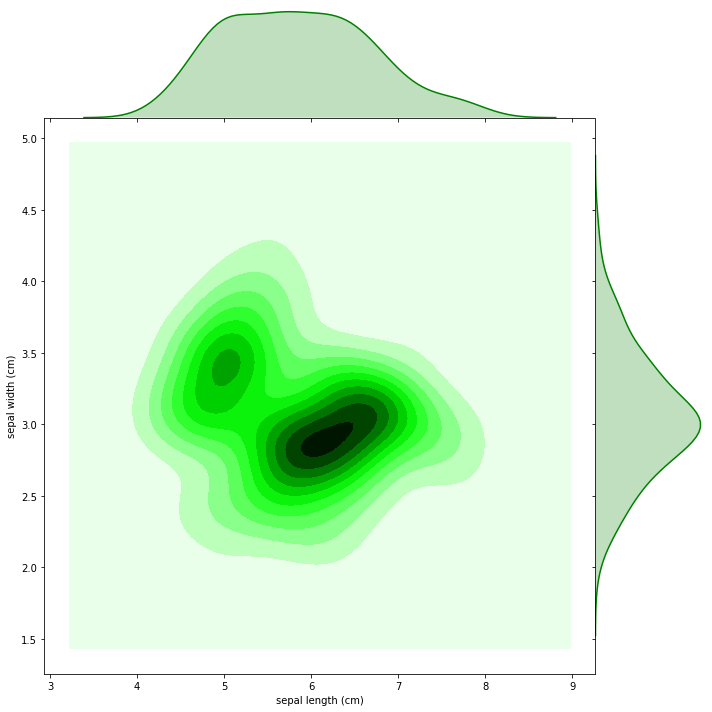

In [5]:
# Importamos la librería seaborn.
import seaborn as sns

# Creamos un jointplot de tipo "kde", indicando los nombres de las dos columnas
# que queremos utilizar como variables, el color y el tamaño de la figura.
g = sns.jointplot("sepal length (cm)", "sepal width (cm)", 
                  data=df, 
                  kind="kde", 
                  space=0, color="g", height=10)

Otra función muy útil de la librería seaborn es [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html), que crea una matriz de gráficas con las relaciones entre pares de variables del conjunto de datos. 

Así, para el conjunto de Iris que contiene cinco columnas (los cuatro atributos y la clase), pairplot generará una matriz de 5x5, mostrando diagramas de dispersión para cada par de variables. En la diagonal se muestra un histograma de los valores de la variable.


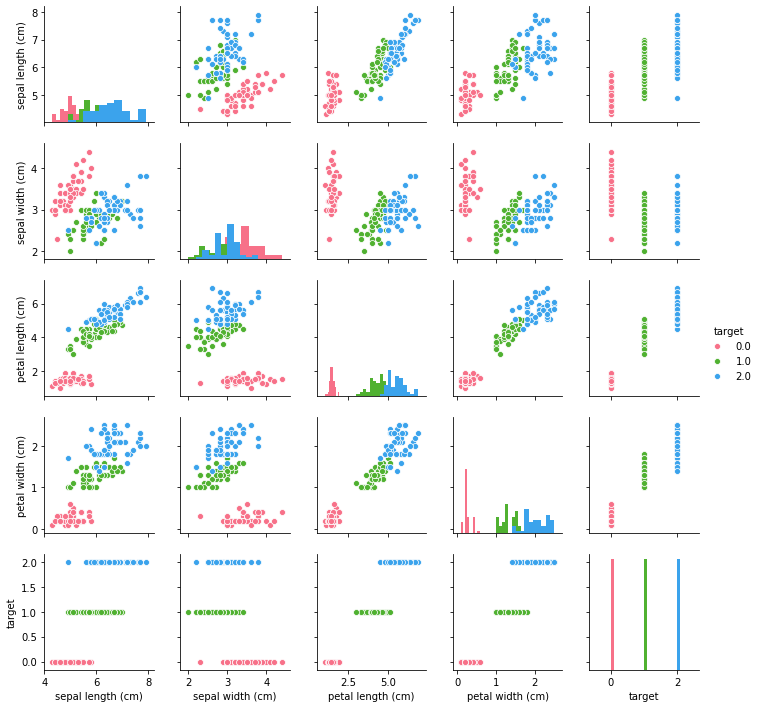

In [6]:
# Importamos la librería seaborn.
import seaborn as sns

# Generamos un pairplot coloreando las muestras según la clase a la que pertenecen
# y especificando una paleta de colores concreta.
sns.pairplot(df, hue="target", height=2, palette=sns.color_palette("husl", 3), diag_kind='hist')


Esta visualización es muy útil para realizar una primera aproximación a los datos. Así, por ejemplo, si estuviéramos afrontando un problema de clasificación, podríamos tener una idea de qué atributos nos serán más útiles para la clasificación o de qué tipo de algoritmos nos servirían para afrontar el problema.

Seaborn también nos permite generar mapas de calor o _heatmaps_. Por ejemplo, podemos calcular la correlación entre cada par de atributos de nuestro conjunto de datos y mostrarlo en un mapa de calor: 

In [7]:
list(df)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

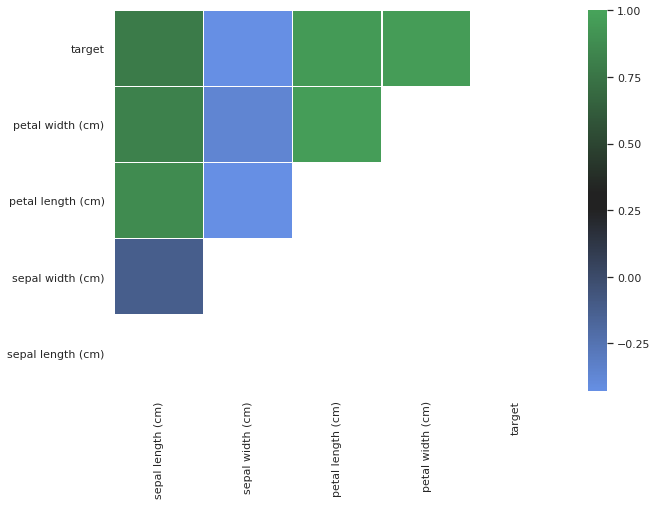

In [21]:
import seaborn as sns


sns.set(style="white")

# Calculamos la correlación entre atributos.
corr = df.corr()

# Generamos una máscara triangular (una matriz del mismo tamaño que la matriz
# de correlaciones, con valores False en el triángulo inferior y True en el resto).
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generamos la figura matplotlib.
f, ax = plt.subplots(figsize=(10, 7))

# Creamos un mapa de colores.
cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)

# Dibujamos el mapa de calor, utilizando como máscara la matriz mask y
# los colores especificados.
sns.heatmap(corr, mask=mask, cmap=cmap, 
            xticklabels=list(df), yticklabels=(list(df)),
            linewidths=.5, ax=ax)

# Por un error en la versión de matplotlib, hay que especificar manualmente
# los límites del eje y
# Esta instrucción podrá eliminarse cuando utilicemos matplotlib 3.1.2
_ = plt.ylim((0,5))

Fijaos que hemos generado y aplicado una máscara para evitar que se muestren valores repetidos ya que la matriz de correlación es simétrica:

In [22]:
print(mask)

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


## Grafos con Networkx

Podemos generar una representación gráfica de un grafo [Networkx](https://networkx.github.io/) con la función `draw`.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


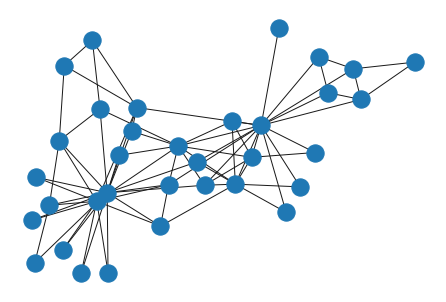

In [26]:
# Importamos la librería Networkx.
import networkx as nx

# Importamos el grafo del club de karate Zachary.
G = nx.karate_club_graph()

# Mostramos el grafo.
nx.draw(G)

Networkx permite ajustar la visualización del grafo, seleccionando los colores y tamaños de los nodos y aristas y decidiendo la posición de cada nodo en el plano en función de un algoritmo concreto. Vamos a generar una representación gráfica del grafo anterior que represente el grado de los nodos con el tamaño.

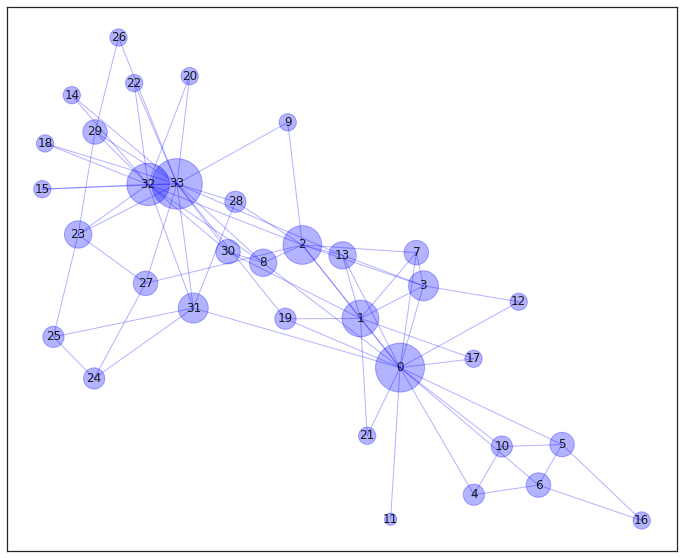

In [27]:
# Generamos una nueva figura.
plt.figure(1, figsize=(12, 10)) 

# Calculamos las posiciones de los nodos del grafo en el plano con el algoritmo
# spring.
graph_pos = nx.spring_layout(G)

# Calculamos el grado de los nodos del grafo.
d = nx.degree(G)

# Mostramos los nodos del grafo, especificando la posición, el tamaño (en función del grado), 
# el color y la transparencia.
nx.draw_networkx_nodes(G, graph_pos, 
                       node_size=[v[1] * 150 for v in d], 
                       node_color='blue', 
                       alpha=0.3)

# Mostramos las aristas del grafo, especificando la posición, 
# el color y la transparencia.
nx.draw_networkx_edges(G, graph_pos, edge_color='blue', alpha=0.3)

# Mostramos las etiquetas, indicando la fuente y el tamaño.
a = nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')


También podemos usar el color de los nodos para representar propiedades de los mismos. Por ejemplo, el color puede usarse para representar la comunidad a la que pertecen. La comunidad a la que pertenece cada nodo puede obtenerse de la ejecución de un algoritmo de [detección de comunidades](https://en.wikipedia.org/wiki/Community_structure).

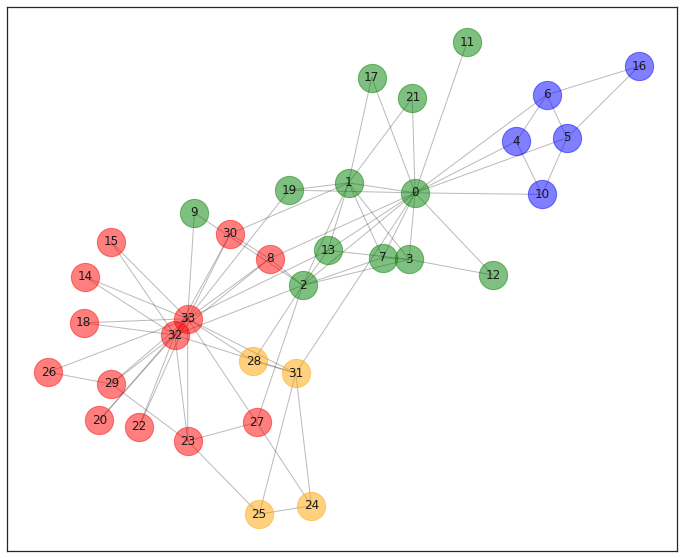

In [63]:
# Importamos la librería de detección de comunidades.
import community

# Generamos una nueva figura.
plt.figure(1, figsize=(12, 10)) 

# Calculamos las posiciones de los nodos del grafo en el plano con el algoritmo
# spring.
graph_pos = nx.spring_layout(G)

# Detectamos las comunidades existentes en el grafo.
partition = community.best_partition(G)

# Definimos los colores que utilizaremos para los nodos.
colors = ['green', 'blue', 'red', 'orange', 'yellow', 'magenta', 'white']

# Para cada comunidad detectada, mostramos los nodos:
for count,com in enumerate(set(partition.values())):

    # Seleccionamos los nodos de la comunidad que estamos procesando.
    list_nodes = [nodes for nodes in partition.keys() 
                  if partition[nodes] == com]
    
    # Mostramos los nodos, coloreados según la comunidad a la que pertenecen.
    nx.draw_networkx_nodes(G, graph_pos, list_nodes, 
                           node_size = 800,
                           node_color = colors[count],
                           alpha = 0.5)

# Mostramos las aristas del grafo, especificando la posición, 
# el color y la transparencia.
nx.draw_networkx_edges(G, graph_pos, edge_color='k', alpha=0.3)

# Mostramos las etiquetas, indicando la fuente y el tamaño.
a = nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')

## Mapas con geoplotlib

Veamos algunos ejemplos de visualización de datos sobre mapas. 

Primero, mostraremos un conjunto de puntos geoespaciales en un mapa.

In [31]:
# Importamos la librería geoplotlib.
import geoplotlib

# Cargamos el fichero bus.csv, que contiene coordenadas geográficas de paradas de autobuses.
data = geoplotlib.utils.read_csv('data/bus.csv')

# Mostramos los puntos del fichero directamente sobre un mapa en color azul.
geoplotlib.dot(data, color='b', point_size=0.75)

# Mostramos el mapa dentro del notebook.
geoplotlib.inline()

FileNotFoundError: [Errno 2] No such file or directory: 'data/bus.csv'

Nota: Si el mapa no se carga correctamente, volved a ejecutar el código una segunda vez.

Fijaos que el fichero de datos contiene tres atributos: dos de ellos nos indican la posición geográfica (latitud y longitud) y el tercero contiene el nombre. Los dos primeros atributos (`lat` y `lon`) son utilizados por geoplotlib para saber en qué lugar del mapa se debe mostrar el punto que representa cada muestra.

In [32]:
# Mostramos un resumen de los datos.
print(data)

# Mostramos la primera muestra como ejemplo.
print(data.head(1).values())

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

AttributeError: 'numpy.ndarray' object has no attribute 'head'

Con geoplotlib se pueden generar también mapas interactivos. Vamos a generar la misma visualización que en el ejemplo anterior en modo interactivo.

In [64]:
# Importamos la librería geoplotlib.
import geoplotlib

# Cargamos el fichero bus.csv, que contiene coordenadas geográficas de paradas de autobuses.
data = geoplotlib.utils.read_csv('data/bus.csv')

# Mostramos los puntos del fichero directamente sobre un mapa en color azul.
geoplotlib.dot(data, color='b', point_size=0.75)

# Mostramos el mapa de manera interactiva.
geoplotlib.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/bus.csv'

Notad que la única diferencia es la última instrucción, en la que indicamos el modo de visualización.

En la visualización interactiva podemos utilizar la ruedecilla del ratón o las teclas `i`/`o` para ajustar el zoom de la imagen y mover el ratón dejando el botón izquierdo pulsado o las teclas `a`/`d`/`w`/`s` para mover la visualización.

En segundo lugar, representaremos un grafo en el cual los nodos se encuentran geoposicionados.

In [38]:
# Importamos la librería geoplotlib.
import geoplotlib

# Cargamos el fichero flights.csv, que contiene datos sobre vuelos.
data = geoplotlib.utils.read_csv('data/flights.csv')

# Mostramos el grafo proyectado sobre el mapa, indicando los atributos que informan
# de la longitud y latitud del nodo de origen y destino para cada arista.
geoplotlib.graph(data,
                 src_lat='lat_departure',
                 src_lon='lon_departure',
                 dest_lat='lat_arrival',
                 dest_lon='lon_arrival',
                 color='afmhot_r',
                 alpha=16,
                 linewidth=2)

# Mostramos el mapa dentro del notebook.
geoplotlib.inline()

FileNotFoundError: [Errno 2] No such file or directory: 'data/flights.csv'

En este caso, cada una de las filas del fichero 'flights.csv' representa una de las aristas del grafo, que queda determinada por la posición del nodo de origen (`lat_departure` y `lon_departure`) y del nodo de destino (`lat_arrival` y `lon_arrival`).

In [17]:
# Mostramos un resumen de los datos.
print(data)

# Mostramos la primera muestra como ejemplo.
print(data.head(1).values())

DataAccessObject(['lon_departure', 'lat_departure', 'lon_arrival', 'lat_arrival'] x 57859)
[array([61.838]), array([55.509]), array([38.51]), array([55.681])]


En tercer lugar, veremos cómo podemos delimitar zonas en mapas y generar visualizaciones que aprovechen estas zonas. En concreto, generaremos un mapa de los Estados Unidos, coloreando los condados según el ratio de desempleo de los mismos.

In [37]:
# Importamos las librerías geoplotlib y json.
import geoplotlib
import json

# Definimos la función get_color, que devuelve el color en el que debe pintarse
# cada condado según la tasa de desempleo (almacenada en la variable unemployment)
# y el mapa de colores elegido (almacenado en la variable cmap).
def get_color(properties):
    key = str(int(properties['STATE'])) + properties['COUNTY']
    if key in unemployment:
        return cmap.to_color(unemployment.get(key), .15, 'lin')
    else:
        return [0, 0, 0, 0]

# Abrimos y cargamos el fichero unemployment.json.
with open('data/unemployment.json') as fin:
    unemployment = json.load(fin)

# Seleccionamos un mapa de color.
cmap = geoplotlib.colors.ColorMap('Blues', alpha=255, levels=10)

# Dibujamos los polígonos que delimitan los condados, pintándolos según nos indique la función
# get_color.
geoplotlib.geojson('data/gz_2010_us_050_00_20m.json', 
                   fill=True, 
                   color=get_color, 
                   f_tooltip=lambda properties: properties['NAME'])

# Pintamos los perímetros de los polígonos de color blanco.
geoplotlib.geojson('data/gz_2010_us_050_00_20m.json', 
                   fill=False, 
                   color=[255, 255, 255, 64])

# Fijamos la visualización a los Estados Unidos.
geoplotlib.set_bbox(geoplotlib.utils.BoundingBox.USA)

# Mostramos el mapa dentro del notebook.
geoplotlib.inline()


FileNotFoundError: [Errno 2] No such file or directory: 'data/unemployment.json'

Fijaos que en este caso hemos usado datos de dos ficheros diferentes para realizar la visualización. Por un lado, el fichero `gz_2010_us_050_00_20m.json` contiene la definición de los polígonos que delimitan los condados. Por otro lado, el fichero `unemployment.json` incluye el ratio de desempleo de cada condado, que hemos usado para colorear el mapa.

Cuando hemos dibujado los polígonos rellenos de color, hemos especificado el parámetro `f_tooltip`. Este parámetro permite definir la información que se mostrará en el mapa interactivo cuando pasemos el ratón por encima de la zona. Veámoslo generando una visualización interactiva del mismo mapa.

In [36]:
# Dibujamos los polígonos que delimitan los condados, pintándolos según nos indique la función
# get_color.
geoplotlib.geojson('data/gz_2010_us_050_00_20m.json', 
                   fill=True, 
                   color=get_color, 
                   f_tooltip=lambda properties: properties['NAME'])

# Pintamos los perímetros de los polígonos de color blanco.
geoplotlib.geojson('data/gz_2010_us_050_00_20m.json', 
                   fill=False, 
                   color=[255, 255, 255, 64])

# Fijamos la visualización a los Estados Unidos.
geoplotlib.set_bbox(geoplotlib.utils.BoundingBox.USA)

# Mostramos el mapa interactivo.
geoplotlib.show()

NameError: name 'get_color' is not defined